In [2]:
#importing Libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import sklearn 

In [3]:
#Storing data from the CSV file into dataFrame
data = pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
len(data)

50

In [6]:
data.shape

(50, 4)

In [7]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [8]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is R&D Spend
Column number 2 is Administration
Column number 3 is Marketing Spend
Column number 4 is Profit


In [9]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [10]:
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
#checking if the data has null values
data.isnull()

,R&D Spend,Administration,Marketing Spend,Profit
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [13]:
#Checking duplicate values if any
print('There are', data.duplicated().sum(),'duplicate values in the dataset.')

There are 0 duplicate values in the dataset.


In [14]:
c = data.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


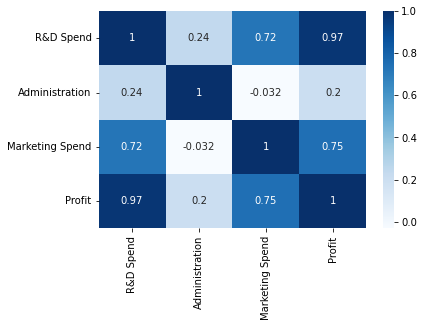

In [15]:
#plotting heatMap for the data
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

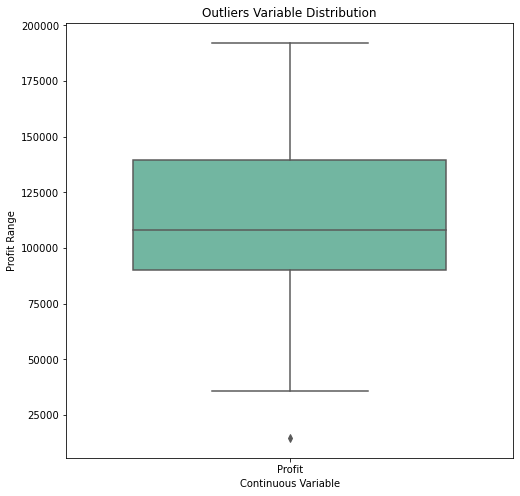

In [16]:
#varaiables distribution
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set2" , width=0.7) 
                                                                            
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

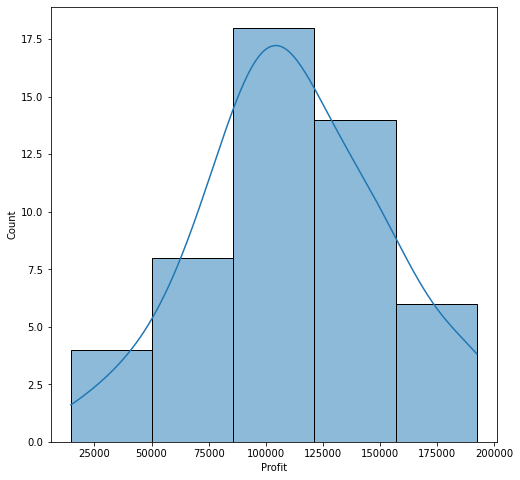

In [18]:
#Histplot of the data
sns.histplot(data['Profit'],bins=5,kde=True)
plt.show()

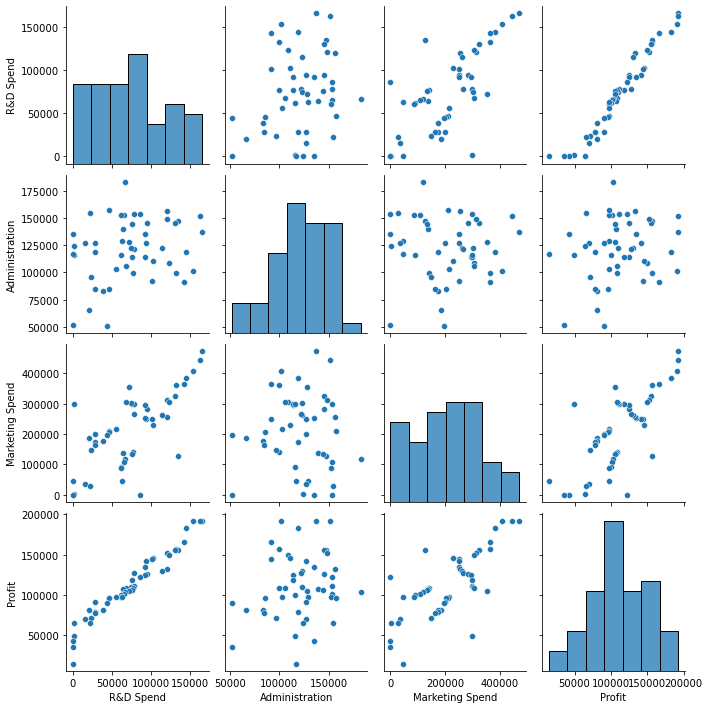

In [19]:
#Plotting pair plot of the data
sns.pairplot(data)
plt.show()

In [20]:
# spliting Dataset in Dependent & Independent Variables
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


In [23]:
#splitting into train and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[1.3029813e+05, 1.4553006e+05, 4.0000000e+01],
       [1.1994324e+05, 1.5654742e+05, 2.8000000e+01],
       [1.0002300e+03, 1.2415304e+05, 1.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 8.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.9000000e+01],
       [6.1994480e+04, 1.1564128e+05, 7.0000000e+00],
       [6.3408860e+04, 1.2921961e+05, 5.0000000e+00],
       [7.8013110e+04, 1.2159755e+05, 3.0000000e+01],
       [2.3640930e+04, 9.6189630e+04, 1.4000000e+01],
       [7.6253860e+04, 1.1386730e+05, 3.4000000e+01],
       [1.5505730e+04, 1.2738230e+05, 3.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.9000000e+01],
       [9.1992390e+04, 1.3549507e+05, 2.7000000e+01],
       [6.4664710e+04, 1.3955316e+05, 1.2000000e+01],
       [1.3187690e+05, 9.9814710e+04, 4.2000000e+01],
       [9.4657160e+04, 1.4507758e+05, 3.1000000e+01],
       [2.8754330e+04, 1.1854605e+05, 1.6000000e+01],
       [0.0000000e+00, 1.169

In [24]:
#Importing and training LinearRegression model on the train dataset
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [25]:
LMy_pred = model.predict(x_test)
LMy_pred

array([103365.65430448, 132409.63159464, 133669.58924177,  71596.33493623,
       179574.8809234 , 114195.96899299,  65656.85292429,  97938.81018901,
       114412.29898539, 169772.36831918,  96050.9051499 ,  87515.25731045,
       110242.6075272 ,  90000.89195708, 127479.23515393])

In [26]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848


In [27]:
#predicting the values
LRdf = pd.DataFrame(data={'Predicted value':LMy_pred.flatten(),'Actual Value':y_test.flatten()})
LRdf.head()

,Predicted value,Actual Value
0,103365.654304,103282.38
1,132409.631595,144259.40
2,133669.589242,146121.95
3,71596.334936,77798.83
4,179574.880923,191050.39


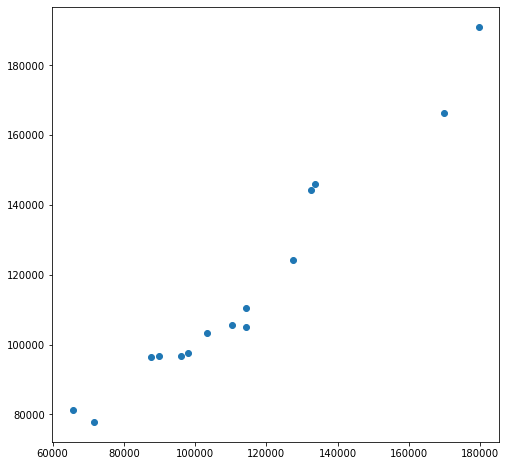

In [28]:
#PLotting the graph on predicted values
plt.scatter(LMy_pred.flatten(),y_test.flatten())
plt.show()

In [39]:
#Accuracy score of the model

LRscore = model.score(x_test,y_test)
print(LRscore*100,'%')

93.24057207634493 %


In [30]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
DTRy_pred = regressor.predict(x_test)
DTRdf = pd.DataFrame({'Predicted profit':DTRy_pred.reshape(-1),'Actual Value':y_test.flatten()})
DTRdf.head()

,Predicted profit,Actual Value
0,101004.64,103282.38
1,141585.52,144259.40
2,141585.52,146121.95
3,71498.49,77798.83
4,182901.99,191050.39


In [40]:
#Accuracy score 
DTscore = regressor.score(x_test,y_test)
print(DTscore*100,'%')

90.60361761746246 %


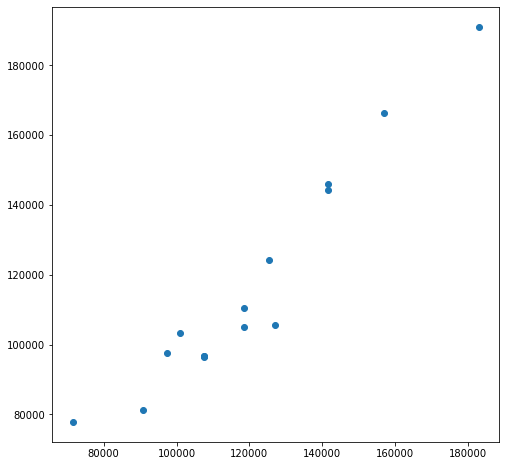

In [32]:
plt.scatter(DTRy_pred.flatten(),y_test.flatten())
plt.show()

In [34]:
# Fitting polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(x_train,y_train)
PRypred = model.predict(x_test)
PRdata = pd.DataFrame(data={"Predicted Profit": PRypred.flatten(),'Actual Value':y_test.flatten()})
print(PRdata.head())


   Predicted Profit  Actual Value
0     103365.654304     103282.38
1     132409.631595     144259.40
2     133669.589242     146121.95
3      71596.334936      77798.83
4     179574.880923     191050.39


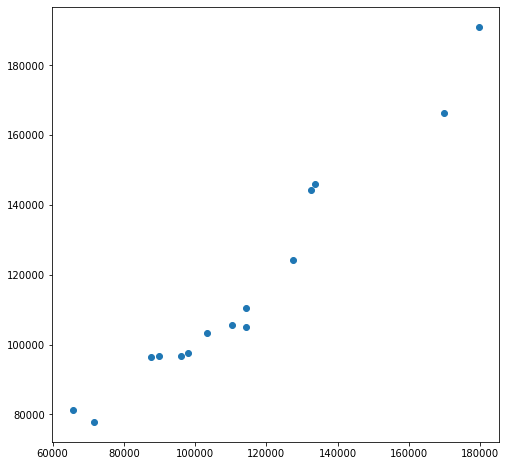

In [35]:
#plotting for ploynomial regression model
plt.scatter(PRypred.flatten(),y_test.flatten())
plt.show()

In [36]:
#implementing Bayesian Ridge model
from sklearn.linear_model import BayesianRidge
bayese = BayesianRidge()
bayese.fit(x_train, y_train)
BRy_pred = bayese.predict(x_test)
BRdf = pd.DataFrame({'Predicted profit':BRy_pred.reshape(-1)})
BRdf.head()

,Predicted profit
0,104631.985275
1,133815.374829
2,134958.727115
3,71593.873727
4,178948.653212


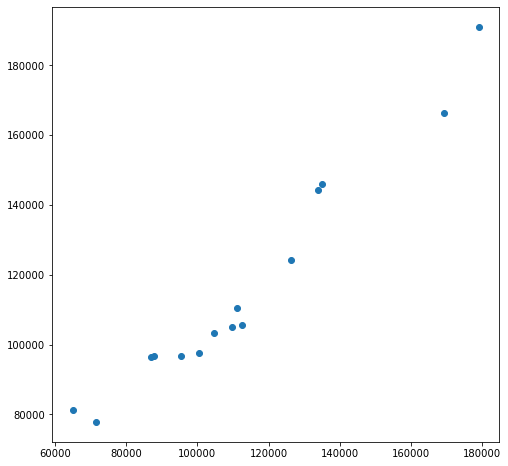

In [37]:
plt.scatter(BRy_pred.flatten(),y_test.flatten())
plt.show()

In [41]:
#Accuracy score
BRscore = bayese.score(x_test,y_test)
print(BRscore*100,'%')

93.48728821753262 %


In [45]:
scores = {
    'LinearRegression':LRscore*100,
    'DecisionTreeRegressor': DTscore*100,
    'Bayesian Ridge model': BRscore*100
}

In [46]:
scores

{'LinearRegression': 93.24057207634493,
 'DecisionTreeRegressor': 90.60361761746246,
 'Bayesian Ridge model': 93.48728821753262}

In [47]:
print(f"The Bayesian Ridge Model has the highest accuracy of {BRscore*100}, Hence this model can be considered for the prediction ")

The Bayesian Ridge Model has the highest accuracy of 93.48728821753262, Hence this model can be considered for the prediction 
